In [3]:
import sklearn
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from tensorflow import keras
import tensorflow as tf
import pickle
import os
import joblib

import warnings
warnings.filterwarnings('ignore')

In [4]:
df_train = pd.read_pickle("./train_data.pkl")
df_test = pd.read_pickle("./test_data.pkl")
df_train

,bouwjaar,kilometer_stand,vermogen,prijs,is_handgeschakeld,is_benzine,upload_datum,apk
302,2013,113514,86,5950.0,1,1,14,139
123,2006,267645,65,1295.0,1,1,22,93
90,2009,223623,67,3250.0,1,1,6,139
53,2008,78387,78,3950.0,1,1,5,363
242,2012,204063,86,3950.0,1,1,14,139
...,...,...,...,...,...,...,...,...
74,2006,91984,78,2950.0,1,1,6,213
119,2007,130061,78,2949.0,1,1,8,271
294,2011,227017,84,1450.0,1,0,19,250
460,2012,162000,86,4995.0,1,1,14,139


In [5]:
X_train = df_train.drop(['prijs'], axis=1)
y_train = df_train[['prijs']]

X_test = df_test.drop(['prijs'], axis=1)
y_test = df_test[['prijs']]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tf, X_valid, y_train_tf, y_valid = train_test_split(X_train, y_train)

Epoch 1/500
13/13 [==============================] - 0s 19ms/step - loss: 20703502.0000 - mae: 3832.5535 - mse: 20703502.0000 - val_loss: 18800562.0000 - val_mae: 3655.9661 - val_mse: 18800560.0000
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 20675900.0000 - mae: 3829.5442 - mse: 20675900.0000 - val_loss: 18762704.0000 - val_mae: 3651.7683 - val_mse: 18762704.0000
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 20618164.0000 - mae: 3823.5120 - mse: 20618164.0000 - val_loss: 18685856.0000 - val_mae: 3643.6370 - val_mse: 18685856.0000
Epoch 4/500
13/13 [==============================] - 0s 5ms/step - loss: 20506160.0000 - mae: 3812.2690 - mse: 20506160.0000 - val_loss: 18544228.0000 - val_mae: 3628.9167 - val_mse: 18544228.0000
Epoch 5/500
13/13 [==============================] - 0s 5ms/step - loss: 20300292.0000 - mae: 3792.2256 - mse: 20300292.0000 - val_loss: 18301428.0000 - val_mae: 3603.8501 - val_mse: 18301428.0000
Epoch 6/500
13

(0.0, 57.0)

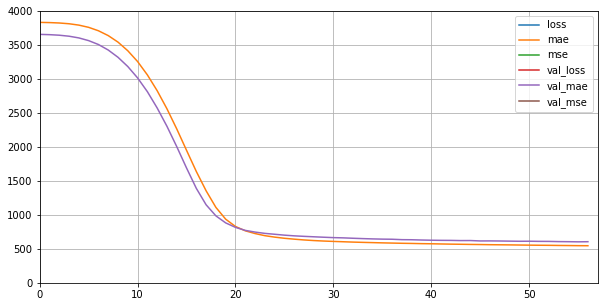

In [6]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="relu", input_shape=X_train.shape[1:]),
#     keras.layers.Dense(200, activation="relu"),
#     keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.005)

model.compile(
    loss="mean_squared_error", 
    optimizer=optimizer, 
    metrics=['mae', 'mse']
)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)

history = model.fit(
    X_train_tf, 
    y_train_tf.values, 
    batch_size=32, 
    epochs=500, 
    validation_data=(X_valid, y_valid.values),
    verbose=1,
    callbacks=[callback]
)

mse_test = model.evaluate(X_test, y_test.values)

pd.DataFrame(history.history).plot(figsize=(10, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 4000) 
plt.gca().set_xlim(0, len(history.history['loss'])) 

In [7]:
model_version = "0001"
model_name = "TFAuto"
model_path = os.path.join(model_name) 
model.save(model_path)
scaler_path = os.path.join(model_name, 'TFScaler.pkl') 
joblib.dump(scaler, scaler_path) 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: TFAuto\assets


['TFAuto\\TFScaler.pkl']